<a href="https://colab.research.google.com/github/Hamza-t/Linear-Regression/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real-estate-price-prediction

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
#for importing data (Kaggle)
import os
import opendatasets as od


In [ ]:
#Connect with Kagle !
path="https://www.kaggle.com/quantbruce/real-estate-price-prediction"
od.download(path)

Skipping, found downloaded files in "./real-estate-price-prediction" (use force=True to force download)


In [ ]:
path_c= "./real-estate-price-prediction"
os.listdir(path_c)

['Real estate.csv']

In [ ]:
real_estate=pd.read_csv(path_c+"/Real estate.csv")
real_estate.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
#summary
real_estate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
#Removing NA values in the dataset
real_estate.dropna()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
#mean
house_age_mean=real_estate["X2 house age"].mean()
print("house_age_mean=", house_age_mean)

mean_convenience_stores=real_estate["X4 number of convenience stores"].mean()
mean_convenience_stores
print("mean_convenience_stores=",mean_convenience_stores)

house_age_mean= 17.71256038647343
mean_convenience_stores= 4.094202898550725


In [ ]:
import seaborn as sns

**Regression Plots**

The correlation between house age and house price of unit area is -0.2105670462772168 with p value of 1.5604255047969416e-05


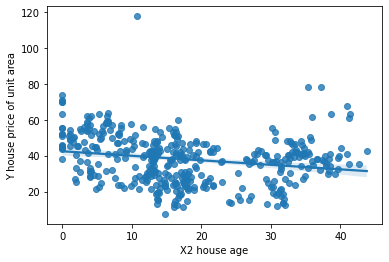

In [ ]:
#regression plot
sns.regplot(x="X2 house age", y="Y house price of unit area",data=real_estate)

from scipy import stats
#correlation
pearson_coef,p_value=stats.pearsonr(real_estate["X2 house age"],real_estate["Y house price of unit area"])
print("The correlation between house age and house price of unit area is", pearson_coef, "with p value of", p_value)

The correlation between distance to the nearest MRT station and house price of unit area is -0.6736128553689182 with p value of 4.639825030360989e-56


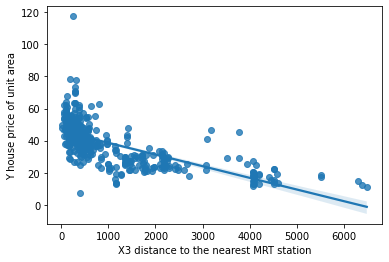

In [ ]:
#regression plot
sns.regplot(x="X3 distance to the nearest MRT station", y="Y house price of unit area",data=real_estate)

#correlation
pearson_coef1,p_value1=stats.pearsonr(real_estate["X3 distance to the nearest MRT station"],real_estate["Y house price of unit area"])
print("The correlation between distance to the nearest MRT station and house price of unit area is", pearson_coef1, "with p value of", p_value1)

The correlation between the number of convenience stores and house price of unit area is 0.5710049111111485 with p value of 3.413483340495673e-37


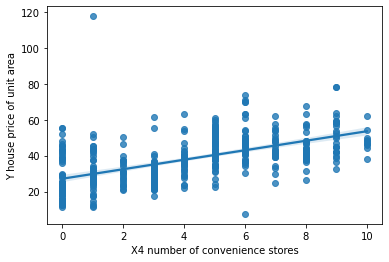

In [ ]:
#regression plot
sns.regplot(x="X4 number of convenience stores", y="Y house price of unit area",data=real_estate)

#correlation
pearson_coef2,p_value2=stats.pearsonr(real_estate["X4 number of convenience stores"],real_estate["Y house price of unit area"])
print("The correlation between the number of convenience stores and house price of unit area is", pearson_coef2, "with p value of", p_value2)

The correlation between the  latitude and house price of unit area is 0.5463066525035893 with p value of 1.3877612957789282e-33


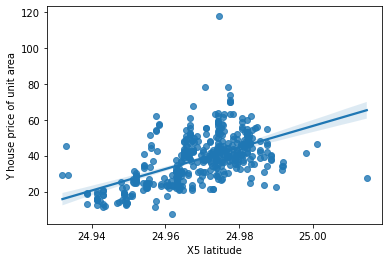

In [ ]:
#regression plot
sns.regplot(x="X5 latitude", y="Y house price of unit area",data=real_estate)

#correlation
pearson_coef3,p_value3=stats.pearsonr(real_estate["X5 latitude"],real_estate["Y house price of unit area"])
print("The correlation between the  latitude and house price of unit area is", pearson_coef3, "with p value of", p_value3)

The correlation between longitude and house price of unit area is 0.5232865070287727 with p value of 1.7651906040485146e-30


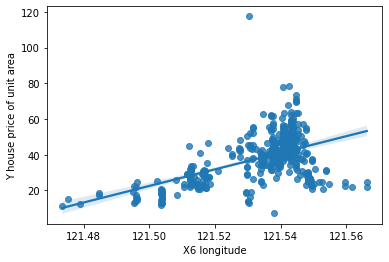

In [ ]:
#regression plot
sns.regplot(x="X6 longitude", y="Y house price of unit area",data=real_estate)

#correlation
pearson_coef4,p_value4=stats.pearsonr(real_estate["X6 longitude"],real_estate["Y house price of unit area"])
print("The correlation between longitude and house price of unit area is", pearson_coef4, "with p value of", p_value4)

## Linear Regression

In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [ ]:
#Simple Linear Regression

X2=real_estate[["X2 house age"]]
Y=real_estate[["Y house price of unit area"]]

In [ ]:
lm.fit(X2,Y)
Yhat=lm.predict(X2)
Yhat

array([[34.38706764],
       [37.53067287],
       [39.08990107],
       [39.08990107],
       [41.17725495],
       [40.64912927],
       [33.75834659],
       [37.32948214],
       [34.46251416],
       [37.93305434],
       [33.68290006],
       [40.85032001],
       [39.1653476 ],
       [37.3043333 ],
       [39.11504991],
       [33.45656048],
       [42.43469705],
       [37.98335203],
       [38.18454276],
       [42.05746442],
       [41.30299916],
       [39.79406865],
       [38.73781729],
       [39.89466401],
       [32.47575565],
       [35.06608637],
       [41.65508295],
       [39.81921749],
       [37.6061194 ],
       [40.64912927],
       [35.92114699],
       [34.99063984],
       [32.90328596],
       [38.28513813],
       [38.56177539],
       [38.93900802],
       [38.73781729],
       [39.41683602],
       [41.65508295],
       [38.36058466],
       [39.01445455],
       [38.20969161],
       [33.35596512],
       [33.78349543],
       [41.75567831],
       [33

In [ ]:
print("Intercept=",lm.intercept_)
print("Coefficient=",lm.coef_)
print("R squared=", lm.score(X2,Y))

Intercept= [42.43469705]
Coefficient= [[-0.25148842]]
R squared= 0.04433848097791171


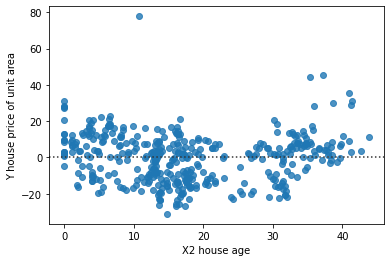

In [ ]:
#residual plot

sns.residplot(x="X2 house age", y="Y house price of unit area", data=real_estate)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


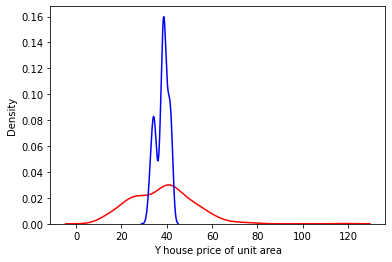

In [ ]:
#Actual values vs Predicted values of house price per unit area

ax1=sns.distplot(real_estate["Y house price of unit area"], hist=False,color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

In [ ]:
#linear regression with multiple input 
Z=real_estate[["X1 transaction date","X2 house age", "X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]]
lm.fit(Z,Y)
Yhat1=lm.predict(Z)
Yhat1

array([[47.1689389 ],
       [47.82573429],
       [48.79677789],
       [48.36964101],
       [46.13886467],
       [31.13584564],
       [38.61587363],
       [46.85211217],
       [ 9.16603868],
       [34.77290915],
       [33.57234765],
       [53.09676524],
       [40.81426207],
       [26.94175908],
       [45.60486371],
       [38.10925895],
       [50.74281482],
       [37.18549698],
       [46.73342273],
       [47.53381528],
       [35.27726629],
       [49.46841634],
       [28.83473867],
       [47.85745455],
       [34.85705632],
       [31.97023446],
       [46.14266672],
       [42.09675228],
       [42.74715351],
       [45.6877317 ],
       [13.30333363],
       [40.52337885],
       [30.63871176],
       [46.3959655 ],
       [47.09156123],
       [33.19408286],
       [30.47381406],
       [30.84947324],
       [44.37062824],
       [45.87840415],
       [14.39995637],
       [16.50429405],
       [36.5591134 ],
       [40.18913549],
       [47.67033493],
       [39

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


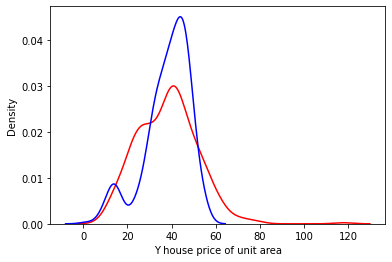

In [ ]:


#Actual vs Predicted plot of house price of unit area

ax2=sns.distplot(real_estate["Y house price of unit area"], hist=False,color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values", ax=ax2)



In [ ]:
from sklearn.model_selection import train_test_split

#We split the data such that 70% is for training while 30% is for testing

x_train,x_test,y_train,y_test=train_test_split(Z,Y, test_size=0.3, random_state=0)
y_test

,Y house price of unit area
356,45.3
170,14.4
224,46.0
331,15.6
306,50.2
...,...
353,31.3
81,36.8
107,26.6
362,40.0


In [ ]:
x_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
294,2013.500,26.4,335.52730,6,24.97960,121.54140
96,2013.417,6.4,90.45606,9,24.97433,121.54310
377,2013.333,3.9,49.66105,8,24.95836,121.53756
89,2013.500,23.0,3947.94500,0,24.94783,121.50243
233,2013.333,39.7,333.36790,9,24.98016,121.53932
...,...,...,...,...,...,...
323,2013.417,28.6,197.13380,6,24.97631,121.54436
192,2013.167,43.8,57.58945,7,24.96750,121.54069
117,2013.000,13.6,4197.34900,0,24.93885,121.50383
47,2013.583,35.9,640.73910,3,24.97563,121.53715


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


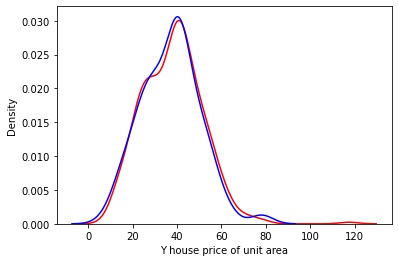

In [ ]:
#Actual vs Predicted plot after splitting the data 
ax3=sns.distplot(real_estate["Y house price of unit area"], hist=False,color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Values", ax=ax3)

In [ ]:
lm.intercept_

array([-14437.10080228])

In [ ]:
print(x_train.columns)
lm.coef_

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')


array([[ 5.14622746e+00, -2.69695448e-01, -4.48746107e-03,
         1.13327690e+00,  2.25472976e+02, -1.24236012e+01]])

## Ridge

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
np.linspace(1,100,100)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [ ]:
np.arange(1,10,0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5])

In [ ]:
lambdas=np.linspace(1,100,100)

In [ ]:
params={'alpha':lambdas}

In [ ]:
model=Ridge(fit_intercept=True)

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_estimator_

Ridge()

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00610578, 0.00472064, 0.00493214, 0.00501044, 0.00544639,
        0.00511739, 0.00410841, 0.00425177, 0.00418167, 0.00404561,
        0.00439513, 0.00442441, 0.00430179, 0.00453157, 0.00453393,
        0.0041441 , 0.0041503 , 0.00401597, 0.00436144, 0.00479443,
        0.00413225, 0.0040632 , 0.00419571, 0.00437601, 0.00422971,
        0.00401025, 0.00520351, 0.00521328, 0.0044476 , 0.00410542,
        0.0045279 , 0.00470369, 0.00417728, 0.00425129, 0.00466499,
        0.00432141, 0.00396905, 0.00399916, 0.00475776, 0.00413456,
        0.00426276, 0.00414751, 0.00446835, 0.00420725, 0.00436709,
        0.00441728, 0.00435934, 0.0042176 , 0.00443096, 0.0046257 ,
        0.00529568, 0.00460746, 0.0041085 , 0.00481999, 0.00414619,
        0.00427847, 0.00418816, 0.00444965, 0.00503876, 0.00435543,
        0.00421796, 0.00427954, 0.00417061, 0.00468681, 0.00416942,
        0.00407429, 0.00451429, 0.00403872, 0.00403659, 0.00414376,
        0.00404916, 0.0040359 ,

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -6.607 (std: 0.815)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -6.612 (std: 0.817)
Parameters: {'alpha': 2.0}

Model with rank: 3
Mean validation score: -6.613 (std: 0.817)
Parameters: {'alpha': 3.0}

Model with rank: 4
Mean validation score: -6.614 (std: 0.817)
Parameters: {'alpha': 4.0}

Model with rank: 5
Mean validation score: -6.614 (std: 0.817)
Parameters: {'alpha': 5.0}



In [ ]:
ridge_model=grid_search.best_estimator_

In [ ]:
ridge_model.fit(x_train,y_train)

Ridge()

In [ ]:
list(zip(x_train.columns,ridge_model.coef_))

[('X1 transaction date',
  array([ 5.80820485e+00, -2.59885664e-01, -5.71902941e-03,  1.11348654e+00,
          6.84001702e+00, -6.58644805e-01]))]

## Lasso

In [ ]:
lambdas=np.linspace(1,10,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3....
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
       

In [ ]:
grid_search.best_estimator_

Lasso()

In [ ]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -6.734 (std: 0.855)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -6.734 (std: 0.856)
Parameters: {'alpha': 1.0909090909090908}

Model with rank: 3
Mean validation score: -6.734 (std: 0.857)
Parameters: {'alpha': 1.1818181818181819}

Model with rank: 4
Mean validation score: -6.735 (std: 0.857)
Parameters: {'alpha': 1.2727272727272727}

Model with rank: 5
Mean validation score: -6.735 (std: 0.858)
Parameters: {'alpha': 1.3636363636363638}



In [ ]:
lasso_model=grid_search.best_estimator_
lasso_model.fit(x_train,y_train)
list(zip(x_train.columns,lasso_model.coef_))

[('X1 transaction date', 0.0),
 ('X2 house age', -0.2551733159363363),
 ('X3 distance to the nearest MRT station', -0.005862987130324283),
 ('X4 number of convenience stores', 0.9638358559805829),
 ('X5 latitude', 0.0),
 ('X6 longitude', -0.0)]

## ElasticNet

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 6.281083816555603
MSE: 75.48117075638945
RMSE: 8.687990029712825
R2 Square 0.5570983456178773
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.536963801694876
MSE: 85.71904934615095
RMSE: 9.258458259675363
R2 Square 0.5499050172248117
__________________________________


## polynomial regression 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

x_train_2_d = poly_reg.fit_transform(x_train)
x_test_2_d = poly_reg.transform(x_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train_2_d,y_train)

test_pred = lin_reg.predict(x_test_2_d)
train_pred = lin_reg.predict(x_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.662400000000001
MSE: 114.06591999999998
RMSE: 10.680164792736111
R2 Square 0.33069420929268845
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.054325259515571
MSE: 96.65311418685121
RMSE: 9.831231570197664
R2 Square 0.49249225117482553
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
